# The Bisection Method
The bisection algorithm is an algorithm to find the roots of a continuous function using the simple **property of intermediate values**:
if a function changes sign in an interval, it has atleast one root in that interval.   
Thus we guess possible intervals in which the roots lie and adjust the bounds repeatedly by dividing the interval in halves and checking which half the root lies in, by comparing signs with the functional value at the midpoint   

## Algorithm:

- Input:    
    - Function f(x) to find the root of.
    - Interval [a,b] such that f(a)⋅f(b)<0
    - Tolerance level ϵ

- Check initial condition:    
    - If f(a)⋅f(b)>0 , then a root might not exist within the given interval, and the method cannot be applied. Otherwise, proceed.

- Iterative Steps:     
    - Set n=0 (iteration counter).
    - While (b−a)/2>ϵ
        - Compute the midpoint m=(a+b)/2
        - Compute f(m)
        - If f(m)=0, then m is the root and stop.
        - If f(a)⋅f(m)<0, set b=m
        - Else, set a=m
        - Increment i (iteration counter) and stop when the new value of m and the old value of m differ by less than the given tolerance value

Output:
        The root approximation is m, with an error less than the tolerance ϵ

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# Define the function
def f(x):
    return np.sin(x) - x**2

In [4]:
# Define the bisection method
def bisection_method(x_l, x_u, df):
    
    x_m_new = (x_l + x_u)/2
    df["Iteration"].append(1)
    df["x_l"].append(x_l)
    df["x_u"].append(x_u)
    
    if f(x_m_new)==0:
        print("Root found:", x_m_new)
        
    elif f(x_m_new)*f(x_l)<0:     # Root is between x_l and x_m
        x_u = x_m_new             # Set new upper bound as x_m_new
        
    elif f(x_m_new)*f(x_u)<0:     # Root is between x_m and x_u
        x_l = x_m_new             # Set new lower bound as x_m_new

    df["x_m"].append(x_m_new)
    df["f(x_m)"].append(f(x_m_new))

    i = 0
    while (i==0 or abs(x_m_new - x_m_old)>1e-6):
        x_m_old = x_m_new
        x_m_new = (x_l + x_u)/2
        
        df["Iteration"].append(i+2)
        df["x_l"].append(x_l)
        df["x_u"].append(x_u)
        
        if f(x_m_new)==0:
            print("Root found:", x_m_new)
            break
            
        elif f(x_m_new)*f(x_l)<0:     # Root is between x_l and x_m
            x_u = x_m_new             # Set new upper bound as x_m_new
            
        elif f(x_m_new)*f(x_u)<0:     # Root is between x_m and x_u
            x_l = x_m_new             # Set new lower bound as x_m_new
            
        df["x_m"].append(x_m_new)
        df["f(x_m)"].append(f(x_m_new))

        e = abs((x_m_new - x_m_old)/x_m_new)*100     # Find error
        df["|Error| in %"].append(e) 
        i+=1
    return x_m_old, x_m_new

In [5]:
# Note the following behavior of the function
print("f(0.5) =", f(0.5))
print("f(1) =", f(1))
# From the alternating of the signs we can say that there is a root between 0.5 and 1, as expected 

f(0.5) = 0.229425538604203
f(1) = -0.1585290151921035


In [6]:
# Call the bisection method for this interval
df = { "Iteration" : [], "x_l" : [], "x_u" : [], "x_m" : [], "|Error| in %" : [None], "f(x_m)" : []}
x_m_old, x_m_new = bisection_method(0.5, 1, df)
df = pd.DataFrame.from_dict(df)  # Create table
print(df)

    Iteration       x_l       x_u       x_m  |Error| in %        f(x_m)
0           1  0.500000  1.000000  0.750000           NaN  1.191388e-01
1           2  0.750000  1.000000  0.875000     14.285714  1.918502e-03
2           3  0.875000  1.000000  0.937500      6.666667 -7.282514e-02
3           4  0.875000  0.937500  0.906250      3.448276 -3.409242e-02
4           5  0.875000  0.906250  0.890625      1.754386 -1.574791e-02
5           6  0.875000  0.890625  0.882812      0.884956 -6.830094e-03
6           7  0.875000  0.882812  0.878906      0.444444 -2.434662e-03
7           8  0.875000  0.878906  0.876953      0.222717 -2.527990e-04
8           9  0.875000  0.876953  0.875977      0.111483  8.341716e-04
9          10  0.875977  0.876953  0.876465      0.055710  2.910163e-04
10         11  0.876465  0.876953  0.876709      0.027847  1.919118e-05
11         12  0.876709  0.876953  0.876831      0.013922 -1.167833e-04
12         13  0.876709  0.876831  0.876770      0.006961 -4.879

In [7]:
print(f"Final Result : {x_m_new} with |Error|% : {abs((x_m_new - x_m_old)/x_m_new)*100}")

Final Result : 0.8767271041870117 with |Error|% : 0.00010877664347911216


In [8]:
print(abs(x_m_new - x_m_old))   # Confirming that we have satisfied the tolerance criterion
print(abs(x_m_new - x_m_old)>1e-6)

9.5367431640625e-07
False


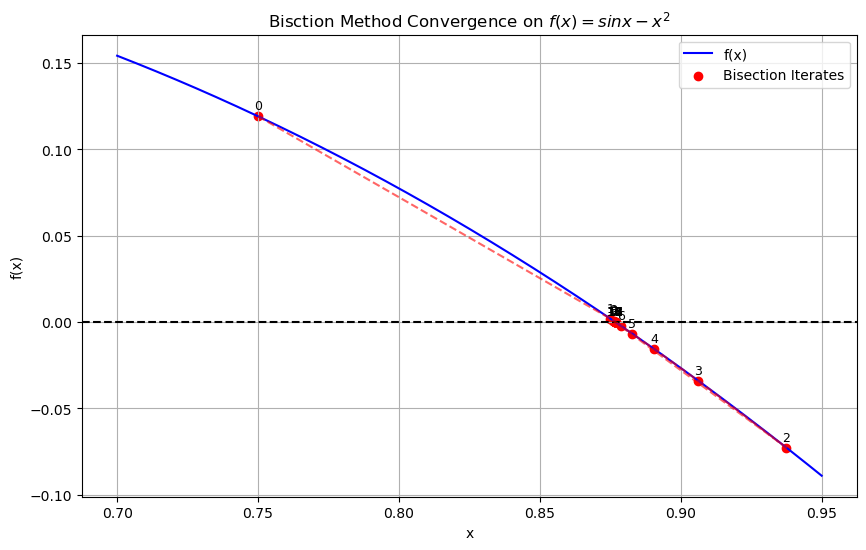

In [15]:
# Convert x_i+1 and f(x_i+1) to numpy arrays for plotting
x_vals = np.array(df["x_m"])
y_vals = np.array(df["f(x_m)"])

# Plot the function curve
x_plot = np.linspace(0.7, 0.95, 500)
y_plot = f(x_plot)

plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_plot, label="f(x)", color='blue')
plt.axhline(0, color='black', linestyle='--')

# Plot bisection steps
plt.scatter(x_vals, y_vals, color='red', label='Bisection Iterates')
plt.plot(x_vals, y_vals, color='red', linestyle='dashed', alpha=0.6)

# Annotate each iteration
for i, (x, y) in enumerate(zip(x_vals, y_vals)):
    plt.annotate(f"{i}", (x, y), textcoords="offset points", xytext=(0,5), ha='center', fontsize=9)

plt.title("Bisction Method Convergence on $f(x) = sinx - x^2$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()